# Tugas Ujian Akhir Semester 
# Mata Kuliah Kecerdasan Buatan
#### Nama : Alna Yopa Khotimah
#### NIM    : 09011181722003



# A new machine learning technique for an accurate diagnosis of coronary artery disease
Link Paper acuan : https://www.sciencedirect.com/science/article/abs/pii/S0169260718314585.


Penyakit Coronary artery disease (CAD) adalah jenis penyakit kardiovaskular (CVD) yang paling umum.. Ini adalah penyebab utama kematian di seluruh dunia. Statistik yang diterbitkan oleh Organisasi Kesehatan Dunia (WHO) mengungkapkan bahwa sekitar 17,7 juta orang meninggal akibat CAD di Australia pada tahun 2015, berkontribusi hingga 31% dari semua kematian. Sangat mungkin bahwa deteksi CAD yang akurat dan intervensi tepat waktu dapat mencegah banyak kematian CAD ini. Penelitian ini bertujuan untuk menyajikan metodologi baru (kombinasi penggunaan beberapa algoritma pembelajaran mesin klasik dan algoritma evolusi) untuk mendeteksi CAD. Selain itu, tujuan utama dari makalah ini adalah untuk merancang model efektif baru menggunakan beberapa pembelajaran mesin dan metode data mining untuk mendeteksi CAD. Dalam penelitian ini, kami menggunakan Diagnosis Support System (DSS).


## 1. Mengimport Library yang dibutuhkan

In [127]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
from keras.utils import to_categorical

PENJELASAN :
* import numpy as np berarti memasukan library numpy lalu menginisialisasi library numpy menjadi 'np' guna mempermudah pemanggilan kembali library ini ketika proses pengolahan data dilakukan. Numpy berfungsi sebagai library dimana numpy ini dapat digunakan juga di library lain ketika menganalisis data misalnya pada library Scikit Learn. 

* import pandas as pd berarti  memasukan library pandas lalu menginisialisasikan library pandas menjadi 'pd' guna mempermudah ketika pemangilan library ini ketika proses pengolahan data dilakukan. Pandas sebagai library yang berfungsi untuk mengola data dan salah satu fiturnya yang sering digunakan adalah Dataframe yang memungkinkan untuk melakukan pembacaan sebuah file lalu mengubahnya kedalam bentuk tabel. Adapun fitur lainnya seperti group by, agregasi, dan fitur lainnya.

* from sklearn.preprocessing import MinMaxScaler,OneHotEncoder berarti bahwa melalui library sklearn.preprocessing memasukan sub-library MinMaxScaler dan OneHotEncoder. MinMax Scaler dibutuhkan untuk menormalisasikan data. Sedangkan OneHotEncoder digunakan untuk mengola data kategorikal.

* Matplotlib adalah library Python 2D yang dapat menghasilkan plot dengan kualitas tinggi dalam berbagai format dan dapat digunakan di banyak platform.Matplotlib dapat digunakan sebagai pembuat grafik dalam berbagai platform. Grafik yang dapat dibuat beragam, seperti grafik garis, batang, lingkaran, histogram, dsb.

* import train_test_split adalah library dimana merupakan sublibrary dari modul model_selection di library sklearn.

* Keras adalah library yang ditujukan untuk memudahkan pembuatan model NN (Neural Network). Keras menyediakan fasilitas untuk membuat berbagai arsitektur NN seperti  convolutional, recurrent, multi input-multi output, layer sharing dan model sharing.  Keras menggunakan backend Tensorflow atau CNTK (Microsoft Cognitive Toolkit). 

* from keras.models import Sequential digunakan untuk membuat model sequential.
* from keras.layers import Dense, Dropout adalah library yang digunakan untuk keperluan layer pada saat pembuatan model.
* from keras.activations import relu
* from keras.utils import to_categorical adalah libary yang berfungsi untuk mengkonversi data binary menjadi data yang dapat dikkelompokkan, sehingga data tersebut dapat diambil bagian-bagiannya sebagai sebuah confusion matrix

## 2. Dataset

Dataset penyakit jantung Z-Alizadeh Sani dapat ditemukan di UCI Dataset "https://archive.ics.uci.edu/ml/machine-learning-databases/00412/". Dataset ini merupakan data penyakit jantung. Data Z-Alizadeh diperoleh dari 303 pasien yang memiliki 54 fitur dan 1 kolom label yang menjelaskan apakah pasien Normal atau pasien mengidap CAD (Coronary artery disease). Pada label jumlah pasien Normal sebanyak 87 orang dan pasien CAD sebanyak 216.
Fitur yang terdapat dalam dataset dibagi menjadi 4 kategori yaitu :
1. Demografis
2. Gejala dan hasil pemberiksaan
3. EKG dan
4. Fitur laboratorium dan gema
Pembagiannya dapat dilihat dari tabel berikut ini:

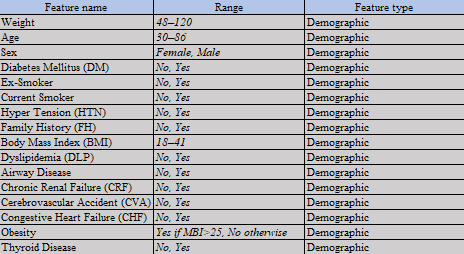

In [128]:
from IPython.display import Image
Image(filename =  "tabel1.png")

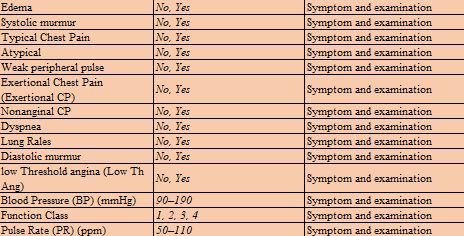

In [129]:
Image(filename =  "tabel2.png")

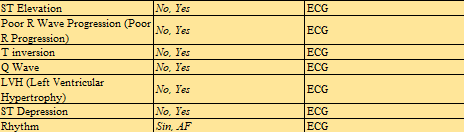

In [130]:
Image(filename =  "3.png")

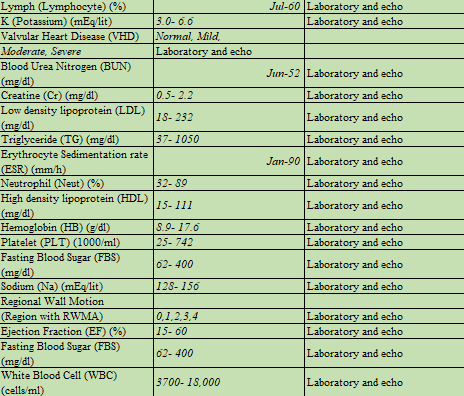

In [131]:
Image(filename =  "4.png")

Sedangkan untuk label dari data Z-Alizadeh Sani berada dikolom Cath dan dibagi menjadi 2 yaitu:
1. Normal
2. Coronary Artery Disease (CAD)

Apabila adanya penyepitan diameter koroner ≥50% pada angiografi Koroner yang berarti pasien CAD dan apabila tidak ada agiografi ini maka pasien normal. Angiografi koroner invasif dilakukan untuk menilai tingkat dan keparahan CAD pada koroner kanan (RCA), arteri anterior desending (LAD) kiri, dan arteri sirkum kiri (LCX). 


### Import Data Set

Dataset yang digunakan dalam tugas ini telah di pre-prosessing dengan mengubah kolom yang bersifat kategorikal menjadi numerik menggunakan sintaks replace contohnya seperti berikut ini:

replace_map = {'CRF': {'N': 0, 'Y': 1}}

df.replace(replace_map,inplace=True).

In [132]:
data=pd.read_csv('data.csv', delimiter=',', 
        header='infer', 
        index_col=False)

Penjelasan:
* delimiter berarti pembatas atau pemisah yang digunakan pada data. dalam kasus ini menggunakan deimiter = ',',.
* header='infer' yaitu bagian yang digunaan sebagai nama kolom dan bagian awal kolom. 'infer' berarti keadaan default dimana secara otomatis menentukan baris pertama dan kolom pertama merupakan nama kolom. 
* index_col=False berarti menentukan panda agar tidak menggunakan kolom pertama sebagai indeks awal.

In [133]:
data.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,0,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,0,0
1,67,70,157,1,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,0,0
2,54,54,164,0,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,1,0
3,66,67,158,1,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,2,1
4,50,87,153,1,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,2,1


Penjelasan:
* data.head() digunakan untuk menampilkan 5 data awal dari dataset yang dimiliki.

###### Melakukan pengecekan apakah data terdapat nilai kosong atau tidak (NaN). Caranya seperti berikut ini:

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 56 columns):
Age                      303 non-null int64
Weight                   303 non-null int64
Length                   303 non-null int64
Sex                      303 non-null int64
BMI                      303 non-null float64
DM                       303 non-null int64
HTN                      303 non-null int64
Current Smoker           303 non-null int64
EX-Smoker                303 non-null int64
FH                       303 non-null int64
Obesity                  303 non-null int64
CRF                      303 non-null int64
CVA                      303 non-null int64
Airway disease           303 non-null int64
Thyroid Disease          303 non-null int64
CHF                      303 non-null int64
DLP                      303 non-null int64
BP                       303 non-null int64
PR                       303 non-null int64
Edema                    303 non-null int64
Weak Peripher

Setelah melakukan pengecekan diperoleh hasil bahwa data ditiap kolomnya tidak memiliki data bernilai kosong (NaN)

#### Melakukan pengecekan pada Label yang berada dikolom bernama "Cath". Sebelumnya kolom ini bersifat kategorikal dan telah diubah kedalam bentuk numerik, dimana:
0 = Pasien yang didiagnosa mengidap Coronary artery disease (CAD)

1 = Pasien Normal.
Dengan jumlah masing-masing dari data CAD dan normal seperti berikut ini:

In [135]:
data.groupby('Cath')['Cath'].count()

Cath
0    216
1     87
Name: Cath, dtype: int64

#### Apabila ditampilkan kedalam bentuk tabel akan seperti berikut ini:

Text(0,0.5,'Frekuensi')

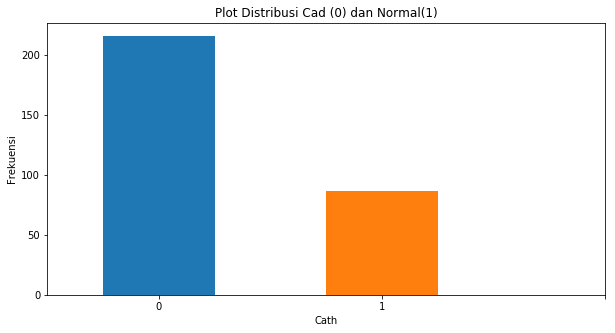

In [136]:
labels = ['0','1']
classes = pd.value_counts(data['Cath'], sort = True)
classes.plot(kind = 'bar', rot=0, figsize=(10, 5))
plt.title("Plot Distribusi Cad (0) dan Normal(1)")
plt.xticks(range(3), labels)
plt.xlabel("Cath")
plt.ylabel("Frekuensi")

In [137]:
data.shape

(303, 56)

#### Slicing
Proses slicing ini dilakukan untuk membagi data yang digunakan sebagai fitur dari mesin dan label. Dalam pembagian yang dimaksud data akan dibagi menjadi dua jenis dengan keterangan data independen/prediktor yang nantinya digunakan sebagai fitur (X) dan data dependen/target yang nantinya digunakan sebagai label (Y). Pembagian data ini menggunakan pandas.DataFrame.iloc. Karena dataset adalah matriks M*N, saya menggunakan slicing dengan format [baris, kolom].

In [138]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

Penjelasan
* Pada variabel X terdapat keterangan [:, :-1]: pilih semua baris dalam dataset, serta semua kolom kecuali kolom terakhir. data dalam variabel X ini akan digunakan sebagai fitur.
* Pada variabel Y terdapat keterangan [:, -1]: keterangan ini berarti pilih semua baris dari kolom terakhir (Cath).
* Kedua proses diatas ketika dilakukan akan membagi data menjadi fitur (X) dan label (Y) dan data yang awalnya dalam bentuk matriks berubah menjadi array seperti berikut ini:

In [139]:
X

array([[ 53.,  90., 175., ...,  50.,   0.,   0.],
       [ 67.,  70., 157., ...,  40.,   4.,   0.],
       [ 54.,  54., 164., ...,  40.,   2.,   1.],
       ...,
       [ 48.,  77., 160., ...,  55.,   0.,   0.],
       [ 57.,  90., 159., ...,  55.,   0.,   0.],
       [ 56.,  85., 170., ...,  55.,   0.,   0.]])

In [140]:
Y

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,

## 3. Preprosessing

 Apabila kita perhatikan dataset pada keterangan fitur yang disebutkan sebelumnya ketika data berupa numerical data misalnya pada kolom Age yang memiliki range 30-36 tahun dan Weight memilik range 48-120 kg. Meskipun kedua kolom ini memiliki data berjenis numerik, namun range atau rentang nilainya berbeda dan cukup jauh. Hal ini akan menimbulkan masalah ketika melakukan pemodelan Machine Learning karena sebagian besar model Machine Learning berdasarkan pada perhitungan Euclidean Distance. Perhitungan Euclidean distance adalah perhitungan jarak dari 2 buah titik. Oleh karena itu proses feature scaling digunakan dalam proses pemodelan machine learning. 


#### Feature Scaling

* Feature Scaling merupakan tahap yang dilakukan pada dataset yang dimiliki untuk menghilangkan nilai atau variabel data yang mendominasi karena perbedaan rentang yang jauh. Tahap ini akan membuat data berupa numerik memiliki skala atau rentang nilai yang sama.

Pada tugas ini saya menggunakan penskalaan data MinMaxScaler. MinMaxScaler juga dikenal dengan sebutan normalisasi data, cara kerja dari metode ini yaitu data akan diberi rentang antar nilai minimum (0) dan nilai maksimum (1).

RUMUS seperti berikut ini:

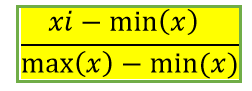

In [141]:
Image(filename ="rumus.png")

Kode yang digunakan untuk menjalan proses scaling menggunakan minmax pada python seperti berikut ini:

In [142]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## 4. Membagi dataset ke dalam training set dan test set (Splitting Data)

In [143]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state = 5,stratify=Y)

Penjelasan:
* X_train berarti yaitu menentukan data dari fitur (X) yang nantinya akan dilatih.
* X_test berarti yaitu menentukan data dari fitur (X) yang nantinya digunakan sebagai data untuk proses tes.
* y_train bearti yaitu menentukan data dari label (Y) yang akan dilatih.
* y_test berarti yaitu menentukan data dari fitur (Y) yang nantinya digunakan sebagai data untuk proses tes.

* test_size = 0.1 berarti proporsi antara data yang nantinya di tes sebesar 10% dan data yang nantinya akan di latih sebesar 90%. Pemilihan perbandingan ini saya lakukan agar machine yang dibuat akan semakin akurat karena proses latihan (train) sering atau banyak dilakukan.
* random_state atau dikenal dengan random numer generator (RNG) digunakan untuk mengacak/random data yang digunakan untuk train dan tes mesin namun pemilihan bilangan randomnya akan selalu sama.

#### One Hot Encoder:

* Penggunakan proses one hot encoder ini saya lakukan untuk menghindari keadaan dimana model yang nantinya dibuat akan mengalami kesalahan akurasi yang disebabkan karena model mengalami kebingunan karena menganggap kolom label (dalam hal ini label data saya 0 dan 1) memiliki urutan atau hierarti padahal 0 dan 1 hanya sekedar inisialisasi. Oleh sebab itu, saya menggunakan metode ini untuk menghindarinya.

* Selain itu, proses ini saya lakukan agar model yang saya buat nantinya memberikan dua output yaitu pasien yang normal dan pasien yang mengidap CAD.
    
    Berikut ini syntax yang dapat digunakan untuk menjalankan metode one hot encoder

In [144]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#### Berikut ini untuk melakukan pengecekan ukuran/shape dari fitur dan label yang digunakan untuk testing nantinya

In [145]:
print(X_test.shape)
print(y_test_one_hot.shape)

(31, 55)
(31, 2)


## 5. Membuat Model ANN

Dalam pembuatan model Machine Learning saya menggunakan pemodelan Sequential. Dengan keterangan sebagai berikut ini:
* Input Layer : Layer pertama merupakan layer yang memiliki jumlah 55 layer sesuai dengan fitur yang saya miliki dan menggunakan aktivation relu.
* Hidden Layer Pertama : Terdiri dari 55 unit neural network menggunakan activation relu. 
* Hidden Layer Kedua : Terdiri dari 55 unit neural network menggunakan activation relu. 
* Output : 2 unit neural network dengan menggunakan activation softmax dimana hasil akhirnya machine akan mengeluarkan dua output yaitu pasien normal dan pasien yang mengidap CAD.


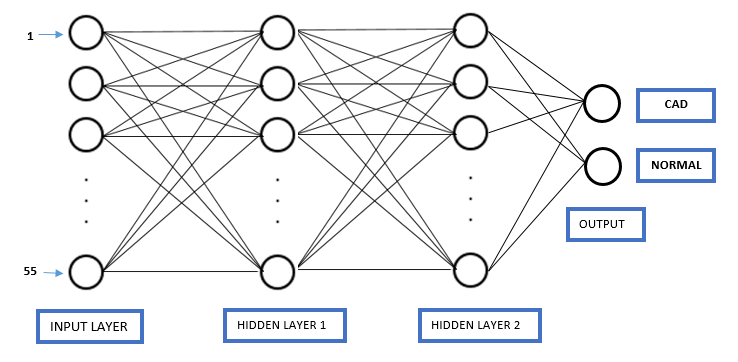

In [146]:
Image(filename ="LAYER.png")

Karena saya menggunakan fungsi softmax dan sebelumnya telah mengubah label menjadi kategorikal maka output yang saya dapatkan akan menghasilkan CAD dan normal.

Berikut ini adalah pemodelan yang saya lakukan:

In [147]:
model = Sequential()
model.add(Dense(55, input_dim= 55, activation='relu'))
Dense(55, activation='relu'),
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer= Adam(lr=0.0001), metrics=['accuracy'])

Penjelasan:
* Model yang dibuat adalah model sequential lalu menambahkan layer satu persatu. Pemodelan diatas saya dapatkan ketika saya telah melakukan berulang kali pemodelan hingga memperoleh arsitektur network yang diinginkan.
* input_dim menampung nilai dari fitur yang dimiliki.
* Dense merupakan hidden layer yang dibuat. Dalam hal ini saya menggunakan jumlah yang sama dengan fitur yang saya miliki agar tidak ada fitur yang hilang dalam proses pembelajaran machine.
* ReLU (Rectified Linear Unit) pada intinya hanya membuat pembatas pada bilangan nol, artinya apabila x ≤ 0 maka x = 0 dan apabila x > 0 maka x = x
*Learning rate = 0.0001 yaitu tingkat ketelitian pada saat proses pembelajaran dilakukan

Dalam menentukan jumlah hidden layer diperoleh melalui proses trial berkali-kali hingga mendapatkan struktur yang baik.

## 6. Fit Model

Fit model ini dilakukan untuk memperoleh hasil akurasi dan loss dataset yang sudah di train lalu di testing
Dimana pada proses ini terjadi proses training dengan parameter:
1. X yang telah di preprocessing
2. Y yang telah dikonversi menjadi categorical
3. Banyaknya Epochs atau proses training
4. batch_size

In [148]:
acc_training = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), batch_size=10, epochs=250)
acc_testing  = model.evaluate(X_test, y_test_one_hot) 

Train on 272 samples, validate on 31 samples
Epoch 1/250
272/272 [==============================] - 0s 1ms/step - loss: 0.7343 - accuracy: 0.3529 - val_loss: 0.7036 - val_accuracy: 0.5161
Epoch 2/250
272/272 [==============================] - 0s 381us/step - loss: 0.6924 - accuracy: 0.5331 - val_loss: 0.6696 - val_accuracy: 0.6774
Epoch 3/250
272/272 [==============================] - 0s 220us/step - loss: 0.6608 - accuracy: 0.6434 - val_loss: 0.6410 - val_accuracy: 0.6774
Epoch 4/250
272/272 [==============================] - 0s 213us/step - loss: 0.6344 - accuracy: 0.6949 - val_loss: 0.6206 - val_accuracy: 0.7097
Epoch 5/250
272/272 [==============================] - 0s 213us/step - loss: 0.6140 - accuracy: 0.7096 - val_loss: 0.6035 - val_accuracy: 0.7097
Epoch 6/250
272/272 [==============================] - 0s 165us/step - loss: 0.5976 - accuracy: 0.7132 - val_loss: 0.5873 - val_accuracy: 0.7097
Epoch 7/250
272/272 [==============================] - 0s 246us/step - loss: 0.5838 - a

Epoch 57/250
272/272 [==============================] - 0s 154us/step - loss: 0.3274 - accuracy: 0.8824 - val_loss: 0.3306 - val_accuracy: 0.8710
Epoch 58/250
272/272 [==============================] - 0s 158us/step - loss: 0.3251 - accuracy: 0.8897 - val_loss: 0.3278 - val_accuracy: 0.8710
Epoch 59/250
272/272 [==============================] - 0s 143us/step - loss: 0.3222 - accuracy: 0.8897 - val_loss: 0.3253 - val_accuracy: 0.8710
Epoch 60/250
272/272 [==============================] - 0s 147us/step - loss: 0.3198 - accuracy: 0.8971 - val_loss: 0.3223 - val_accuracy: 0.8710
Epoch 61/250
272/272 [==============================] - 0s 139us/step - loss: 0.3175 - accuracy: 0.8934 - val_loss: 0.3204 - val_accuracy: 0.8710
Epoch 62/250
272/272 [==============================] - 0s 154us/step - loss: 0.3153 - accuracy: 0.8934 - val_loss: 0.3186 - val_accuracy: 0.8710
Epoch 63/250
272/272 [==============================] - 0s 183us/step - loss: 0.3129 - accuracy: 0.8971 - val_loss: 0.3161 -

272/272 [==============================] - 0s 150us/step - loss: 0.2473 - accuracy: 0.8971 - val_loss: 0.2571 - val_accuracy: 0.9355
Epoch 114/250
272/272 [==============================] - 0s 150us/step - loss: 0.2465 - accuracy: 0.9044 - val_loss: 0.2564 - val_accuracy: 0.9355
Epoch 115/250
272/272 [==============================] - 0s 147us/step - loss: 0.2462 - accuracy: 0.9007 - val_loss: 0.2564 - val_accuracy: 0.9355
Epoch 116/250
272/272 [==============================] - 0s 143us/step - loss: 0.2454 - accuracy: 0.9007 - val_loss: 0.2564 - val_accuracy: 0.9355
Epoch 117/250
272/272 [==============================] - 0s 147us/step - loss: 0.2445 - accuracy: 0.9044 - val_loss: 0.2545 - val_accuracy: 0.9355
Epoch 118/250
272/272 [==============================] - 0s 154us/step - loss: 0.2442 - accuracy: 0.9044 - val_loss: 0.2551 - val_accuracy: 0.9355
Epoch 119/250
272/272 [==============================] - 0s 143us/step - loss: 0.2428 - accuracy: 0.9044 - val_loss: 0.2538 - val_ac

Epoch 169/250
272/272 [==============================] - 0s 158us/step - loss: 0.2128 - accuracy: 0.9191 - val_loss: 0.2331 - val_accuracy: 0.9355
Epoch 170/250
272/272 [==============================] - 0s 147us/step - loss: 0.2119 - accuracy: 0.9191 - val_loss: 0.2334 - val_accuracy: 0.9355
Epoch 171/250
272/272 [==============================] - 0s 161us/step - loss: 0.2117 - accuracy: 0.9191 - val_loss: 0.2331 - val_accuracy: 0.9355
Epoch 172/250
272/272 [==============================] - 0s 147us/step - loss: 0.2114 - accuracy: 0.9228 - val_loss: 0.2322 - val_accuracy: 0.9355
Epoch 173/250
272/272 [==============================] - 0s 161us/step - loss: 0.2110 - accuracy: 0.9191 - val_loss: 0.2325 - val_accuracy: 0.9355
Epoch 174/250
272/272 [==============================] - 0s 165us/step - loss: 0.2100 - accuracy: 0.9228 - val_loss: 0.2319 - val_accuracy: 0.9355
Epoch 175/250
272/272 [==============================] - 0s 154us/step - loss: 0.2097 - accuracy: 0.9228 - val_loss: 0

Epoch 225/250
272/272 [==============================] - 0s 180us/step - loss: 0.1875 - accuracy: 0.9265 - val_loss: 0.2228 - val_accuracy: 0.9355
Epoch 226/250
272/272 [==============================] - 0s 187us/step - loss: 0.1872 - accuracy: 0.9265 - val_loss: 0.2224 - val_accuracy: 0.9355
Epoch 227/250
272/272 [==============================] - 0s 154us/step - loss: 0.1868 - accuracy: 0.9265 - val_loss: 0.2227 - val_accuracy: 0.9355
Epoch 228/250
272/272 [==============================] - 0s 194us/step - loss: 0.1863 - accuracy: 0.9265 - val_loss: 0.2227 - val_accuracy: 0.9355
Epoch 229/250
272/272 [==============================] - 0s 246us/step - loss: 0.1860 - accuracy: 0.9265 - val_loss: 0.2226 - val_accuracy: 0.9355
Epoch 230/250
272/272 [==============================] - 0s 253us/step - loss: 0.1859 - accuracy: 0.9265 - val_loss: 0.2218 - val_accuracy: 0.9355
Epoch 231/250
272/272 [==============================] - 0s 249us/step - loss: 0.1851 - accuracy: 0.9265 - val_loss: 0

Penjelasan :
* batch_size =10 artinya data yang dikirimkan per-10 data.
* epoch yang dilakukan sebanyak 250 kali.

## 7. Evaluasi Model

Secara umum, performa dari proses model neural network untuk dataset Z-Alizadeh Sani yang dibuat tadi sudah dapat dilihat dengan menampilkan akurasinya. hanya saja, untuk performa lain seperti Precisision, Spesificity, dan Sensitivity belum dapat diketahui.  karena membutuhkan fungsi yang berbeda, yaitu confusion matrix.

#### Akurasi

In [149]:
print('akurasinya adalah {}%'.format(acc_testing[1]*100))

akurasinya adalah 93.54838728904724%


## Visualisasi Proses Training dan Validasi

#### Grafik Model Akurasi

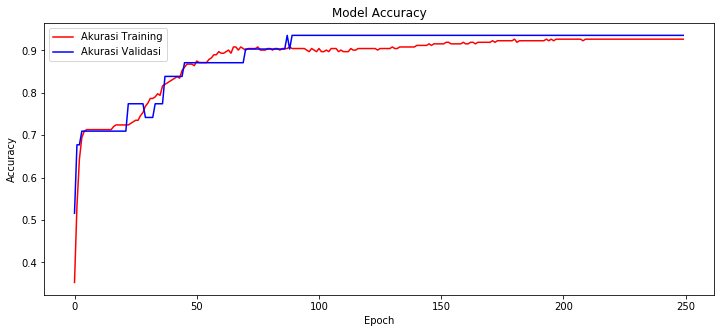

In [150]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

#### Grafik Loss

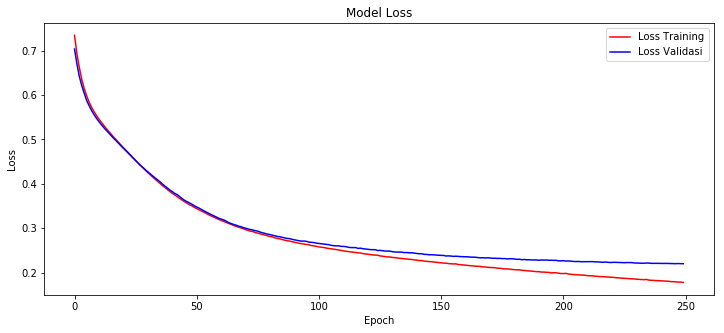

In [151]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

## Performance
Melakukan analisis performance dengan membuat confusion matrix dari Y yang telah diubah menjadi categorical dan nilai prediksi dari model neural network terhadap X yang telah di preprocessing.

#### Confussion Matrix

In [152]:
prediction_x = model.predict_classes(X_test)
prediction_x
prediction_x = model.predict_classes(X_test)
prediction_x

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [153]:
y_test_one_hot

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [154]:
prediction_y = [np.argmax(t) for t in y_test_one_hot]
prediction_y

[1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1]

In [155]:
cm = confusion_matrix(prediction_y, prediction_x)
cm

array([[21,  1],
       [ 1,  8]], dtype=int64)

Pengukuran terhadap kinerja suatu sistem klasifikasi merupakan hal yang penting. Kinerja sistem klasifikasi menggambarkan seberapa baik sistem dalam mengklasifikasikan data. Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya. Pada Hasil diatas dapat disimpulkan bahwa model sudah memiliki kinerja yang cukup baik.

#### Melihat hasil Accuracy, specificity, sensitivity dan precision

In [156]:
training_predicted = model.predict(X_train)
testing_predicted = model.predict(X_test)

In [157]:
training_cm = []
testing_cm = []
from sklearn.metrics import confusion_matrix
for i in range(2):
    training_cm.append(confusion_matrix(y_train_one_hot[:,i],training_predicted[:,i].round()))
    testing_cm.append(confusion_matrix(y_test_one_hot[:,i],testing_predicted[:,i].round()))


In [158]:

#training
accuracy =[]
specificity=[]
sensitivity=[]
precision =[]
f1_score=[]
for i in range(2):
    tp = training_cm[i][0][0]
    fn = training_cm[i][0][1]
    fp = training_cm[i][1][0]
    tn = training_cm[i][1][1]

    accuracy.append((tp+tn)/(tp+tn+fp+fn))
    specificity.append(tn/(tn+fp))
    sensitivity.append(tp/(tp+fn))
    precision.append(tp/(tp+fp))
    f1_score.append((2*sensitivity[i]*precision[i])/(sensitivity[i]+precision[i]))
print("Accuracy training {0}%".format(np.mean(accuracy)*100))
print("Specificity training {0}%".format(np.mean(specificity)*100))
print("Sensitivity training {0}%".format(np.mean(sensitivity)*100))
print("Precision training {0}%".format(np.mean(precision)*100))
print("F1 Score training {0}%".format(np.mean(f1_score)*100))

Accuracy training 92.64705882352942%
Specificity training 91.01242400211473%
Sensitivity training 91.01242400211473%
Precision training 91.01242400211473%
F1 Score training 91.01242400211473%


In [159]:
#testing
accuracy =[]
specificity=[]
sensitivity=[]
precision =[]
f1_score=[]
for i in range(2):
    tp = testing_cm[i][0][0]
    fn = testing_cm[i][0][1]
    fp = testing_cm[i][1][0]
    tn = testing_cm[i][1][1]

    accuracy.append((tp+tn)/(tp+tn+fp+fn))
    specificity.append(tn/(tn+fp))
    sensitivity.append(tp/(tp+fn))
    precision.append(tp/(tp+fp))
    f1_score.append((2*sensitivity[i]*precision[i])/(sensitivity[i]+precision[i]))
print("Accuracy testing {0}%".format(np.mean(accuracy)*100))
print("Specificity testing {0}%".format(np.mean(specificity)*100))
print("Sensitivity testing {0}%".format(np.mean(sensitivity)*100))
print("Precision testing {0}%".format(np.mean(precision)*100))
print("F1 Score testing {0}%".format(np.mean(f1_score)*100))

Accuracy testing 93.54838709677419%
Specificity testing 92.17171717171718%
Sensitivity testing 92.17171717171718%
Precision testing 92.17171717171718%
F1 Score testing 92.17171717171718%


## Kesimpulan:

Model yang dibuat termasuk kedalam ANN karena hidden layer yang dimiliki hanya dua sedangkan jika hidden layer yang dimiliki lebih dari 3 maka termasuk kedalam DNN. Akurasi yang didapatkan seperti berikut ini:

#### Training

Accuracy training 92.64705882352942%

Specificity training 90.62913031985197%

Sensitivity training 90.62913031985197%

Precision training 91.27282491944146%

F1 Score training 90.94239094239094%
#### Testing

Accuracy testing 93.54838709677419%

Specificity testing 92.17171717171718%

Sensitivity testing 92.17171717171718%

Precision testing 92.17171717171718%

F1 Score testing 92.17171717171718%